# Experiments with the bivariate Gaussian

In this notebook, bivariate/2 dimensional Gaussian distribution is studied through visualization and random sampling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

The function **bivariate_plot** takes as input three parameters that uniquely specify a 2x2 covariance matrix:

* `variance1`, the variance of the first feature, `x1`
* `variance2`, the variance of the second feature, `x2`
* $\rho$, the correlation coefficient between `x1` and `x2`

It then depicts a 2-d Gaussian with the mean vector located at the origin (0, 0) and the covariance matrix is given by the parameters mentioned. The display consists of 100 points randomly sampled from the Gaussian, as well as three representative contour lines of the density.

Covariance matrix:
[[ 5.   -0.25]
 [-0.25  5.  ]]


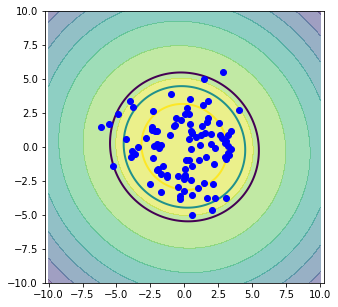

In [2]:
@interact(variance1 = (1,9), variance2 = (1,9), rho=(-0.95,0.95,0.05))
def bivariate_plot(variance1, variance2, rho):
    #
    # Set parameters of Gaussian
    mu = [0,0]
    covariance = rho * np.sqrt(variance1) * np.sqrt(variance2)
    sigma = [[variance1,covariance], [covariance,variance2]]
    np.set_printoptions(precision=2)
    print ("Covariance matrix:")
    print (np.around(sigma, decimals=2))
    #
    # Draw samples from the distribution
    n = 100
    x = np.random.multivariate_normal(mu,sigma,size=n)
    #
    # Set up a plot for the samples and the density contours
    fig, ax = plt.subplots(1,1, figsize = (5,5))
    lim = 10.0
    ax.set_xlim(-lim, lim) # limit along x1-axis
    ax.set_ylim(-lim, lim) # limit along x2-axis    
    ax.set_aspect('equal', 'datalim')
    #
    # Plot the sampled points as blue dots
    ax.plot(x[:,0], x[:,1], 'bo')
    #
    # To display contour lines, first define a fine grid
    res = 200
    xg = np.linspace(-lim, lim, res)
    yg = np.linspace(-lim, lim, res)
    z = np.zeros((res,res))
    # Compute the density at each grid point
    rv = multivariate_normal(mean=mu, cov=sigma)
    for i in range(0,res):
        for j in range(0,res):
            z[j,i] = rv.logpdf([xg[i], yg[j]]) 
    sign, logdet = np.linalg.slogdet(sigma)
    normalizer = -0.5 * (2 * np.log(6.28) + sign * logdet)
    
    # Now plot a few contour lines of the density
    levels = []
    for offset in range(1,4):
        levels.append(normalizer - offset)
        
    ax.contour(xg,yg,z, levels=sorted(levels), cmap='viridis', linewidths=2.0, linestyles='solid')
    
    contourf = ax.contourf(xg, yg, z, alpha=0.5, cmap='viridis',)